In [1]:
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import radical.utils as ru
import radical.pilot as rp
import radical.analytics as ra 

In [2]:
stype = "radical.pilot"
count = 1
total_duration = 0
durations_list_strong = []
durations_means_strong = []
durations_std_strong = []
durations_list_weak = []
durations_means_weak = []
durations_std_weak = []

In [3]:

for i in glob.glob("StrongScaling/*/*"):
    if(not i.endswith("log")):
        session = ra.Session(i, stype)    # print the PMGR_ACTIVE and FINAL timestamp for each pilot
        pilots = session.filter(etype='pilot', inplace=False)
        duration = pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])
        if(duration == 0):
            if(not total_duration == 0):
                duration = total_duration/count
            else:
                duration = total_duration[0]
        total_duration += duration
        
        if(count == 4):
            #reset the graph
            count = 0
            durations_list_strong.append(total_duration/4)
            total_duration = 0
        count += 1
cores = [20,40,80]

In [4]:
stype = "radical.pilot"
count = 1
total_duration = 0
durations_list = []
durations_means = []
durations_std = []
for i in glob.glob("WeakScaling/*/*"):
    if(not i.endswith("log")):
        session = ra.Session(i, stype)    # print the PMGR_ACTIVE and FINAL timestamp for each pilot
        pilots = session.filter(etype='pilot', inplace=False)
        duration = pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])
        if(duration == 0):
            if(not total_duration == 0):
                duration = total_duration/count
            else:
                duration = total_duration[0]
        total_duration += duration
        
        if(count == 4):
            #reset the graph
            count = 0
            durations_list_weak.append(total_duration/4)
            total_duration = 0
        count += 1
cores = [20,40,80]

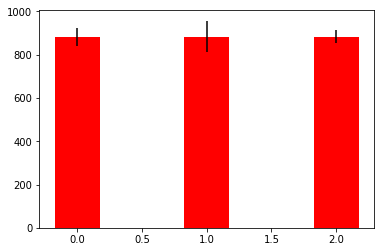

In [5]:
durations_means_strong = sum(durations_list_strong)/len(durations_list_strong)
durations_std_strong[:] = [x - durations_means_strong for x in durations_list_strong]
ind = np.arange(len(durations_list_strong))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, durations_means_strong, width, color='r', yerr=durations_std_strong)
 
plt.show()

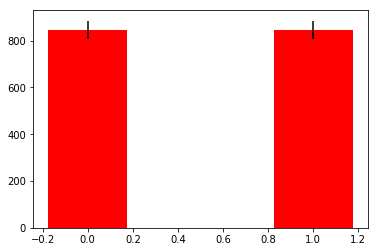

In [6]:
durations_means_weak = sum(durations_list_weak)/len(durations_list_weak)
durations_std_weak[:] = [x - durations_means_weak for x in durations_list_weak]
ind = np.arange(len(durations_list_weak))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, durations_means_weak, width, color='r', yerr=durations_std_weak)
 
plt.show()